### Multinomial Event Model 

In [1]:
x = ["This was an awesome movie",
    "Great movie! I liked it a lot.",
    "Happy Ending! awesome acting by the hero",
    "loved it! truily great",
    "bad not upto the mark",
    "could have been better",
    "Surely a Disappointing movie"]

y = [1,1,1,1,0,0,0]

In [2]:
text_x = ["I was happy and i loved the article in the movie",
          "The movie I saw was bad"]

#### 1. Cleaning

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()
remove_stopwords = set(stopwords.words('english'))

In [5]:
def getCleanedReview(review):
    review = review.lower()
    
    tokens = tokenizer.tokenize(review)
    new_tokens = [token for token in tokens if token not in remove_stopwords]
    stemmed_tokens = [stemmer.stem(token) for token in new_tokens]
    
    cleaned_review = ' '.join(stemmed_tokens)
    
    return cleaned_review

In [6]:
x_clean = [getCleanedReview(i) for i in x]

In [7]:
xt_clean = [getCleanedReview(i) for i in text_x]

In [8]:
print(x_clean)

['awesom movi', 'great movi like lot', 'happi end awesom act hero', 'love truili great', 'bad upto mark', 'could better', 'sure disappoint movi']


#### 2.Vectorization 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
cv = CountVectorizer()

In [35]:
x_vec = cv.fit_transform(x_clean).toarray()

In [36]:
x_vec

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]],
      dtype=int64)

In [37]:
print(cv.get_feature_names())

['act', 'awesom', 'bad', 'better', 'could', 'disappoint', 'end', 'great', 'happi', 'hero', 'like', 'lot', 'love', 'mark', 'movi', 'sure', 'truili', 'upto']


In [14]:
## nVectorization on the test set
xt_vec = cv.transform(xt_clean).toarray()
print(xt_vec)
print(xt_vec.shape)

[[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
(2, 18)


#### 3. Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
mnb = MultinomialNB()
print(mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [17]:
#Training
mnb.fit(x_vec,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
#Prediction
mnb.predict(xt_vec)

In [19]:
mnb.predict_proba(xt_vec)

array([[0.18899963, 0.81100037],
       [0.60235294, 0.39764706]])

In [65]:
ypred = mnb.predict(x_vec)

#### 4. Multivariate Bernoulli Event Model

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
# binarize is a parameter which coverts the train data into 0 and 1 on the basis of the value of binarize provided
# if binarize is 0 then greater than 0 will be 1 and less than 0 equal to 0 0.

In [21]:
print(bnb) # alpha is the laplace transformation variable

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [23]:
bnb.fit(x_vec,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
bnb.predict_proba(xt_vec)

array([[0.14208632, 0.85791368],
       [0.68830318, 0.31169682]])

In [64]:
bnb.predict(xt_vec)

[1 0]


In [27]:
bnb.score(x_vec,y)

1.0

### Generate Confussion Matrix
also shown in gaussian naive bayes for better understanding

In [59]:
from sklearn.metrics import confusion_matrix

In [66]:
cnf_matrix = confusion_matrix(y,ypred)
print(cnf_matrix)

[[3 0]
 [0 4]]


### Visualise Confusion Matrix 

In [67]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

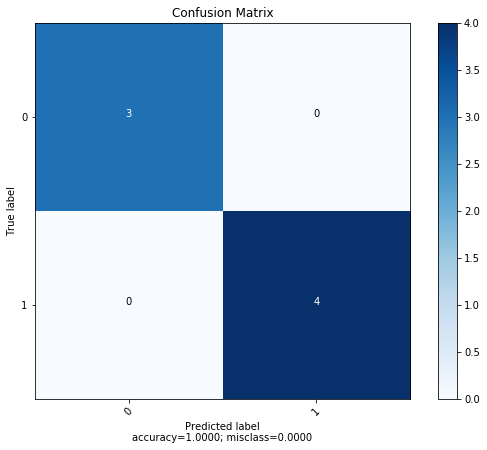

In [68]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix")

### Constructing and Visualising Confusion Matrix
also shown in naive bayes mnist dataset for better understanding

In [71]:
from sklearn.metrics import confusion_matrix

Y_mnb = mnb.predict(x_vec)
cnf_matrix = confusion_matrix(y,Y_mnb)
print(cnf_matrix)

[[3 0]
 [0 4]]


In [86]:
new = ["Coding Blocks is a great source to learn machine learning"]
new = [getCleanedReview(new[0])]
print(new)
cv2 = CountVectorizer(ngram_range = (3,3))
cv2.fit_transform(new).toarray()
print(cv2.get_feature_names())

['code block great sourc learn machin learn']
['block great sourc', 'code block great', 'great sourc learn', 'learn machin learn', 'sourc learn machin']


In [76]:
cv?